In [1]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import machine_learning
from scipy import interpolate

In [2]:
dataprep.new_hdf5('supervised_calibration_dataset')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'propane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'ethane')
dataprep.add_calibration('supervised_calibration_dataset.hdf5','../ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx',label='FormicAcid')
dataprep.add_calibration('supervised_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'acetaldehyde')

Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model. Results saved to supervised_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_fil

In [3]:
dataprep.view_hdf5('supervised_calibration_dataset.hdf5')

**** supervised_calibration_dataset.hdf5 ****
FormicAcid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    counts
|    residuals
|    wavenumber
acetaldehyde
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    Peak_07
|    Peak_08
|    counts
|    residuals
|    wavenumber
carbon dioxide
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
carbon monoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
ethane
|    Peak_01
|    Peak_02
|    Peak_03
|    counts
|    residuals
|    wavenumber
hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
methane
|    Peak_01
|    counts
|    residuals
|    wavenumber
propane
|    Peak_01
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
water
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber


# Interpolated calibration dataset

In [4]:
dataprep.new_hdf5('supervised_calibration_interp')

In [5]:
dataprep.view_hdf5('supervised_calibration_interp.hdf5')

**** supervised_calibration_interp.hdf5 ****


In [6]:
hdf5_interpfilename = 'supervised_calibration_interp.hdf5'
# first a function that will return a normalized interpolated spectra
target_compound = 'water'
# compound = 'water'
hdf5_calfilename = 'supervised_calibration_dataset.hdf5'
spectra_count = 1
def interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count):
    hdf5 = h5py.File(hdf5_calfilename, 'r+')
    # get list of compounds from hdf5 file
    y_data_list = []
    x_data_list = []
    
    compound_list = list(hdf5.keys())
    print(compound_list)
    for _, target_compound in enumerate(compound_list):
        x_data, y_data, labels = machine_learning.generate_spectra_dataset(hdf5_calfilename, target_compound, spectra_count)
        y_data_list.append(y_data)
        x_data_list.append(x_data)
        for i, label in enumerate(labels):
            interpdf = machine_learning.combine_experiment(hdf5_interpfilename, 'interp_'+target_compound, x_data, y_data, label, i) 
            
    return interpdf

['FormicAcid', 'acetaldehyde', 'carbon dioxide', 'carbon monoxide', 'ethane', 'hydrogen', 'methane', 'propane', 'sapphire', 'water']
interp_FormicAcid/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_acetaldehyde/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_carbon dioxide/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_carbon monoxide/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_ethane/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_hydrogen/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to supervised_calibration_interp.hdf5.
interp_methane/0

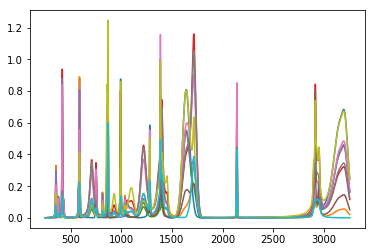

In [7]:
frames = []

interpdf = interpolated_spectra(hdf5_interpfilename, hdf5_calfilename, spectra_count)
frames.append(interpdf)

In [8]:
frames

[             0
 0     0.392963
 1    30.669556
 2  2933.000000
 3     9.331247
 4    61.339113
 5     0.124810
 6     9.207063]

In [9]:
key_list = machine_learning.keyfinder(hdf5_interpfilename)
print(key_list)

['interp_FormicAcid/0', 'interp_acetaldehyde/0', 'interp_carbon dioxide/0', 'interp_carbon monoxide/0', 'interp_ethane/0', 'interp_hydrogen/0', 'interp_methane/0', 'interp_propane/0', 'interp_sapphire/0', 'interp_water/0']


In [10]:
df = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
      keys=None, levels=None, names=None, verify_integrity=False,
      copy=True,sort=True)
df

,0
0,0.392963
1,30.669556
2,2933.000000
3,9.331247
4,61.339113
5,0.124810
6,9.207063


In [11]:
dataprep.view_hdf5('supervised_calibration_interp.hdf5')

**** supervised_calibration_interp.hdf5 ****
interp_FormicAcid
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    counts
|    |    residuals
|    |    wavenumber
interp_acetaldehyde
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    Peak_17
|    |    Peak_18
|    |    Peak_19
|    |    counts
|    |    residuals
|    |    wavenumber
interp_carbon dioxide
|    0
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
| 

# SAVE your hdf5 file before continuing and MAKE COPIES

In [13]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'supervised_calibration_interp-Copy1.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781

(0.10868498605517724, 5.706264946922206, 2898.0, 1.744320526134402, 11.412529893844413, 0.1385557067890194, 1.7432259562088648, "['ethane']")
(0.9999999999999993, 7.45390341893011, 2915.0, 3.313263978477578, 14.90780683786022, 0.14148891132767447, 3.287195513654219, "['methane']")
(0.9999999999999951, 8.117538077077974, 2952.0, 5.315586877300009, 16.235076154155948, 0.20843805570696905, 5.265182809990541, "['ethane']")
(0.3494866503342644, 99.99985638470835, 3194.0, 12.620478173452979, 199.9997127694167, 0.05260264522164769, 9.196368339458065, "['water']")
{'FormicAcid': 50.0, 'acetaldehyde': 12.5, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 100.0, 'hydrogen': 100.0, 'methane': 100.0, 'propane': 100.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210

(0.5016532296752659, 8.25969374012589, 860.0, 7.890323876943011, 16.51938748025178, 0.37615499908052585, 7.868891604918041, "['acetaldehyde']")
(0.29841953290622725, 3.268361567990561, 868.0, 2.9488519253668737, 6.536723135981122, 0.38303343742600804, 2.9469846036173792, "['acetaldehyde', 'propane']")
(0.09064221571908576, 17.345468579972238, 929.0, 2.4634215247029263, 34.690937159944475, 0.06476083037413632, 2.46107356359566, "['acetaldehyde']")
(0.3889969457247352, 3.6855073169053303, 993.0, 6.771759141565932, 7.371014633810661, 0.7548435747571578, 6.766228241601559, "['ethane']")
(0.3403028621364116, 46.066172786317885, 1060.0, 9.861945377640673, 92.13234557263577, 0.08952782997494868, 9.778765592608432, "['FormicAcid']")
(0.7702651574040721, 28.610471423197954, 1219.0, 36.525979667131196, 57.22094284639591, 0.45078233856656713, 36.13552624371499, "['FormicAcid']")
(7.586176901108743e-07, 2.3137424824209023, 1280.0, 0.16129282785502808, 4.627484964841805, 0.032744451764297036, 0.161

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
T

{'FormicAcid': 83.33333333333334, 'acetaldehyde': 50.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 75.0, 'methane': 100.0, 'propane': 0.0, 'sapphire': 25.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0

(0.5661890903553073, 3.4334182007017953, 1280.0, 1.7811076683269857, 6.8668364014035905, 0.19919864771523332, 1.7794785802387358, "['carbon dioxide']")
(0.9999999999999998, 3.481989128435845, 1386.0, 3.6907632367154406, 6.96397825687169, 0.33739520213204954, 3.6849704529091527, "['carbon dioxide']")
(1.0, 23.198882033286008, 1400.0, 15.746258847614598, 46.397764066572016, 0.21605307766180998, 15.582394111469922, "['FormicAcid', 'acetaldehyde']")
(0.2512551422653682, 26.302450123442956, 1716.0, 22.183600315284046, 52.60490024688591, 0.36407775450722124, 22.12143151052164, "['FormicAcid', 'acetaldehyde']")
(0.15282708594842898, 4.304826024532799, 2141.0, 4.170823716510086, 8.609652049065598, 0.43267798631493004, 4.1695775409299785, "['carbon monoxide']")
(0.39296319347832354, 30.669556394489877, 2933.0, 9.331246653173624, 61.339112788979754, 0.12481006546130467, 9.207062760684998, "['FormicAcid', 'acetaldehyde']")
{'FormicAcid': 83.33333333333334, 'acetaldehyde': 50.0, 'carbon dioxide': 

In [14]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [15]:
cal = pd.DataFrame()

In [16]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
cal['fraction']= result[:][0]
cal['sigma']= result[:][1]
# dat['center']= result[:][2]
cal['amplitude']= result[:][3]
cal['fwhm']= result[:][4]
cal['height']= result[:][5]
cal['auc']= result[:][6]
cal['labelencoded']=le.fit_transform(result[:][7])
cal['labels']= result[:][7]
cal['center']= result[:][2]

In [17]:
cal

,fraction,sigma,amplitude,fwhm,height,auc,labelencoded,labels,center
0,0.692916,4.396,3.98245,8.792,0.330487,3.94401,7,['hydrogen'],355
0,0.191106,4.13468,0.387454,8.26936,0.0413051,0.386659,10,['sapphire'],379
0,0.725722,3.64639,3.16739,7.29277,0.312569,3.15038,10,['sapphire'],417
0,0.685657,4.5249,10.8855,9.0498,0.880254,10.8495,7,['hydrogen'],587
0,0.00519864,6.8654,1.41276,13.7308,0.0964968,1.41272,10,['sapphire'],750
0,0.792686,3.90072,1.79935,7.80144,0.161312,1.79549,7,['hydrogen'],815
0,0.0986356,3.2837,6.26081,6.56739,0.867108,6.2595,9,['propane'],869
0,0.726838,3.63502,8.90368,7.27005,0.880978,8.89028,6,['ethane'],993
0,0.966444,4.21238,1.62824,8.42475,0.125002,1.6246,7,['hydrogen'],1035
0,0.945308,3.55323,6.48743,7.10645,0.596285,6.47718,4,['carbon dioxide'],1280


# Experimental dataset

In [22]:
dataprep.view_hdf5('dataimport_ML_df-Copy1.hdf5')

**** dataimport_ML_df-Copy1.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    residuals
|    |    wavenumber
|    45s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|   

|    10s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    125s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    15s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
|    5s
|    |    Peak_01
|    |    Peak_0

In [23]:
key_list = machine_learning.keyfinder('dataimport_ML_df-Copy1.hdf5')
key_list

['300C/25s',
 '300C/35s',
 '300C/45s',
 '300C/55s',
 '300C/65s',
 '320C/25s',
 '320C/30s',
 '320C/40s',
 '320C/50s',
 '320C/60s',
 '340C/20s',
 '340C/30s',
 '340C/40s',
 '340C/50s',
 '340C/60s',
 '360C/20s',
 '360C/30s',
 '360C/40s',
 '360C/50s',
 '360C/60s',
 '380C/15s',
 '380C/25s',
 '380C/35s',
 '380C/45s',
 '380C/55s',
 '390C/10s',
 '390C/15s',
 '390C/20s',
 '390C/25s',
 '390C/30s',
 '400C/10s',
 '400C/125s',
 '400C/15s',
 '400C/5s',
 '400C/75s',
 '410C/10s',
 '410C/125s',
 '410C/15s',
 '410C/5s',
 '410C/75s',
 '420C/10s',
 '420C/5s',
 '420C/625s',
 '420C/75s',
 '420C/875s',
 '430C/4s',
 '430C/5s',
 '430C/6s',
 '430C/7s',
 '430C/8s']

In [24]:
hdf5_calfilename = 'supervised_calibration_dataset.hdf5' 
hdf5_expfilename = 'dataimport_ML_df-Copy1.hdf5'
frames = []
for _, key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 10, plot =False)
    frames.append(df)

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781

(0.46583313047311464, 93.8812992305034, 3193.5, 60014.30052238749, 187.7625984610068, 255.18345333917458, 44073.01609803269, "['water']")
{'FormicAcid': 100.0, 'acetaldehyde': 25.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 75.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 100.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0

(0.028855972433432187, 4.211193864285907, 2330.3, 223.616067303218, 8.422387728571813, 24.710248247644223, 223.58626765634727, "['Unassigned']")
(2.220446049250313e-16, 21.33148820165269, 2946.1, 3059.0565387906026, 42.66297640330538, 67.36032017604771, 3059.0571909981886, "['FormicAcid', 'ethane']")
(0.542545962086435, 86.7453120700977, 3190.7, 54007.32248902251, 173.4906241401954, 241.30121624895008, 40493.834641341076, "['water']")
{'FormicAcid': 100.0, 'acetaldehyde': 25.0, 'carbon dioxide': 50.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 25.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 

(0.5646766422548843, 4.616234160265341, 2137.9, 1231.6372170296352, 9.232468320530682, 102.51249633342027, 1230.3390422262214, "['carbon monoxide']")
(1.0730393296132235e-08, 3.6460561819885604, 2330.3, 196.8335918412258, 7.292112363977121, 25.3579215468323, 196.82160051474662, "['Unassigned']")
(1.3181377900295388e-07, 21.19376626882685, 2945.0, 2775.3371463220647, 42.3875325376537, 61.509951378267985, 2775.337850971634, "['FormicAcid', 'ethane']")
(0.5866591693175001, 92.76028100271166, 3190.7, 61269.44642832399, 185.52056200542333, 251.5852879486407, 44832.964333883036, "['water']")
{'FormicAcid': 83.33333333333334, 'acetaldehyde': 25.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde 

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane a

{'FormicAcid': 83.33333333333334, 'acetaldehyde': 25.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 100.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we f

{'FormicAcid': 83.33333333333334, 'acetaldehyde': 25.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 100.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for propane are: 
870.16

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane a

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The pe

{'FormicAcid': 50.0, 'acetaldehyde': 0.0, 'carbon dioxide': 100.0, 'carbon monoxide': 100.0, 'ethane': 33.33333333333333, 'hydrogen': 100.0, 'methane': 0.0, 'propane': 0.0, 'sapphire': 75.0, 'water': 50.0}
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for

The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for acetaldehyde are: 
858.1315115115115
930.3443643643643
1098.8410210210209
1354.5948748748747
1402.7367767767767
1450.8786786786784
1715.659139139139
2928.233293293293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for carbon dioxide are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
The peaks that we found for carbon monoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The peaks that we found for ethane are: 
993.5306106106106
2898.1446046046044
2952.3042442442443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The peaks that we found for methane are: 
2916.19781781782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for

In [61]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=key_list, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [62]:
dat = pd.DataFrame()

In [63]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
# dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
dat['center']= result[:][2]

In [64]:
dat

fraction    sigma amplitude     fwhm   height      auc  \
300C/25s 0  2.66632e-06  9.47784   251.853  18.9557  12.4817  251.852   
         0     0.506813   4.0129   1034.01   8.0258   101.26  1028.59   
         0     0.636782  3.84759   7306.16  7.69519  708.864  7270.35   
         0  2.55231e-05  2.69962   193.734  5.39924  33.7084  193.741   
         0     0.188666  4.21062   1090.47  8.42124   114.25  1089.49   
         0  1.38778e-15  20.4979   6837.15  40.9957  156.677  6837.15   
         0  6.88713e-07  7.19462   3533.44  14.3892  230.689  3533.44   
         0            0  18.0052   1438.24  36.0103  37.5207  1438.24   
         0     0.841161  29.1589   20781.3  58.3177  243.997  20534.1   
         0            1  15.8466   15275.1  31.6932  306.831  15166.6   
         0  1.05175e-05  47.9173   35138.2  95.8346  344.448  35138.2   
         0     0.179058   26.217   25828.1   52.434  436.042  25776.7   
         0            1  3.77176   285.944  7.54351  24.1317  285.521   
         0     0.489606  3.60812   255.955  7.21624  28.0624  255.753   
         0  1.60982e-15  21.9786   3553.09  43.9572  75.9353  3553.09   
         0     0.553011  79.8096   53203.1  159.619  257.309  41554.6   
300C/35s 0     0.493198  3.84136    985.18  7.68271  101.316   980.38   
         0     0.642997  3.81059   7232.34  7.62118   706.73  7196.91   
         0  1.07692e-14  2.61594   150.018  5.23189  26.9372  150.027   
         0     0.490083  4.12695   1229.31   8.2539  117.814  1226.57   
         0     0.966028  4.26157     205.6  8.52315  15.6051  204.764   
         0  1.11022e-15  20.5743   7441.88  41.1487    169.9  7441.88   
         0  5.93652e-09  7.11561   3457.79  14.2312  228.257   3457.8   
         0            0  18.2118   1501.97  36.4236  38.7388  1501.97   
         0     0.799162  29.0338   21598.4  58.0676  259.413  21355.3   
         0            1  15.7745   16283.5  31.5491   328.58  16168.3   
         0   4.7038e-08  52.5427   37279.7  105.085  333.271  37279.7   
         0     0.177272  26.9016     26193  53.8033  431.212  26140.1   
         0     0.982646  4.00883   532.343  8.01767  42.6181  531.501   
         0  2.80814e-11  3.97073   209.439  7.94147  24.7756  209.423   
...                 ...      ...       ...      ...      ...      ...   
430C/6s  0            1  7.69256   23660.9  15.3851  979.063    23579   
         0  1.11022e-15  50.4553   24675.3  100.911  229.717  24675.3   
         0     0.738487  4.16778   1014.36  8.33557  87.1077  1012.98   
         0     0.520028  93.2303   51105.6  186.461  214.322  38134.3   
430C/7s  0     0.541635  4.39474    7253.4  8.78947  639.906  7198.61   
         0     0.292955  4.04618   570.694  8.09236  59.9954  568.957   
         0     0.619249  3.88885   7308.87   7.7777  706.593  7273.64   
         0  0.000684137  2.73452    234.62  5.46903  40.2928  234.626   
         0      0.63861  4.54011   20832.2  9.08021  1711.63    20768   
         0  4.31266e-13  7.67625   4139.49  15.3525    253.3  4139.49   
         0     0.526453  3.84262   3004.72  7.68524  304.965  3000.67   
         0     0.965685  3.62261    2844.6  7.24521  254.028  2838.81   
         0            1  19.8439   16227.4  39.6878  260.298  16076.3   
         0     0.995222  7.75562   22412.3  15.5112  921.948  22334.5   
         0    0.0305331  48.4932   22094.1  96.9864  211.904  22080.2   
         0      0.88652  4.04306   1008.46  8.08611  83.6815  1006.87   
         0     0.511043  90.3349   45211.9   180.67  196.364  34067.6   
430C/8s  0     0.462596  4.42038   7438.08  8.84075   672.53  7389.79   
         0     0.855428  3.64003   677.076  7.28006    63.28  671.659   
         0     0.550579    3.868   7051.84    7.736  704.375  7021.79   
         0  2.22045e-16  2.70972   227.851  5.41944   39.497  227.858   
         0     0.642756  4.52327   22176.1  9.04653  1825.75  22107.6   
         0  1.86242e-07  7.87199   4241.73   15.744  253.103  4241.74   


In [65]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
X_train=cal[inputs]
y_train = cal['labels']
X_test=dat[inputs]
y_test= dat['labels']

In [66]:
import scipy.stats as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statistics

# Logistic Regression

In [375]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)

# get predictions
Z = logreg.predict(X_test)

logreg.score(X_test, y_test)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.054637865311308764

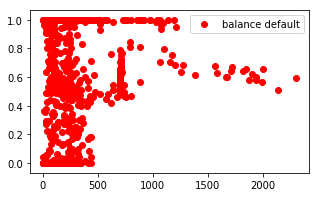

In [376]:



# fig, ax = plt.subplots(figsize=(5, 3))
# ax.scatter(x_data, y_data, label='data')
# ax.scatter(X_train, y_train, label='train')
# ax.scatter(X_test, y_test, label='teste')
# ax.scatter(X_test, regr.predict(X_test), label='predicted')

fig, ax = plt.subplots(figsize=(5, 3))
y = dat['fraction'].values
x = dat['height'].values
# Create the linear regression model
LogRegr = linear_model.LogisticRegression() 
# plotting the balance
ax.scatter(dat['height'], dat['fraction'], label = 'balance default',color='r')

# # fit the linear model 
# LogRegr.fit(x.reshape(-1,1),y.reshape(-1,1))
# xres = np.array(x).reshape(-1,1)
# plt.plot(x,LogRegr.predict_proba(xres)[:,1],'o',label = 'fit')
# # Find the coefficients B0 and B1
# print('B0, B1: ',LogRegr.intercept_, LogRegr.coef_[0])
# ax.set_ylabel('Probability Default')
# ax.set_xlabel('Balance')
# ax.set_title('Probability Default vs. Balance')
plt.legend()

# Multiple Linear regression

In [377]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
X_train=cal[inputs]
y_train = cal['labelencoded']
X_test=dat[inputs]
y_test= dat['labelencoded']

Train error 9.38510140063267
Test error 936428.763483038


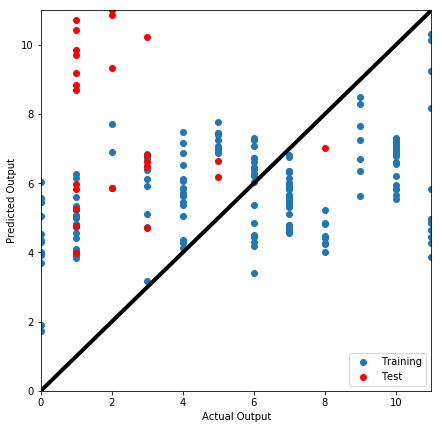

In [378]:
numdescriptors = 8
# train linear model of descriptors
# yrange =  np.arange(1,numdescriptors,1)
# for Y in yrange:
MLR=linear_model.LinearRegression()
MLR.fit(X_train,y_train)
# WE are going to train using the first 8 values

# make predictions on test and train set 
trainpred=MLR.predict(X_train)
# predict the outputs using the training dataset
testpred=MLR.predict(X_test)
# predict using test dataset
#make parity plot 
maxlimit  = y_train.max()

plt.figure(figsize=(7,7))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(y_train,trainpred, label='Training')
plt.scatter(y_test,testpred,color='r', label='Test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')

#calculate the test and train error

print("Train error",mean_squared_error(y_train,trainpred)) # MSE of training dataset
print("Test error",mean_squared_error(y_test,testpred))

# MLR=linear_model.LinearRegression()
# MLR.fit(train[train.columns.values[0:Y]],train[train.columns.values[Y]])
# # WE are going to train using the first 8 values

# # make predictions on test and train set 
# trainpred=MLR.predict(train[train.columns.values[0:Y]])
# # predict the outputs using the training dataset
# testpred=MLR.predict(test[train.columns.values[0:Y]])
# # predict using test dataset
# #make parity plot 
# maxlimit  = train[train.columns.values[Y]].max()

# plt.figure(figsize=(7,7))
# plt.xlim([0,maxlimit]);
# plt.ylim([0,maxlimit]);
# print('This is for Y ='+str(Y))
# plt.scatter(train[train.columns.values[Y]],trainpred, label='Training')
# plt.scatter(test[train.columns.values[Y]],testpred,color='r', label='Test')
# plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
# plt.legend()
# plt.xlabel('Actual Output')
# plt.ylabel('Predicted Output')

# #calculate the test and train error

# print("Train error",mean_squared_error(train[train.columns.values[Y]],trainpred)) # MSE of training dataset
# print("Test error",mean_squared_error(test[train.columns.values[Y]],testpred))
# usually the training error is less than the test error

In [379]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','labelencoded']
X_train=cal[inputs]
y_train = cal['center']
X_test=dat[inputs]
y_test= dat['center']

Train error 511625.7264431974
Test error 26554434955.404053


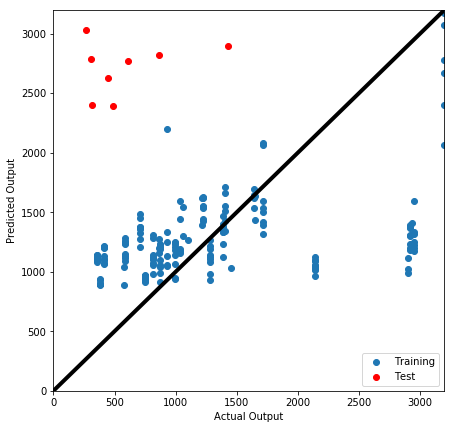

In [380]:
numdescriptors = 8
# train linear model of descriptors
# yrange =  np.arange(1,numdescriptors,1)
# for Y in yrange:
MLR=linear_model.LinearRegression()
MLR.fit(X_train,y_train)
# WE are going to train using the first 8 values

# make predictions on test and train set 
trainpred=MLR.predict(X_train)
# predict the outputs using the training dataset
testpred=MLR.predict(X_test)
# predict using test dataset
#make parity plot 
maxlimit  = y_train.max()

plt.figure(figsize=(7,7))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(y_train,trainpred, label='Training')
plt.scatter(y_test,testpred,color='r', label='Test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')

#calculate the test and train error

print("Train error",mean_squared_error(y_train,trainpred)) # MSE of training dataset
print("Test error",mean_squared_error(y_test,testpred))

# MLR=linear_model.LinearRegression()
# MLR.fit(train[train.columns.values[0:Y]],train[train.columns.values[Y]])
# # WE are going to train using the first 8 values

# # make predictions on test and train set 
# trainpred=MLR.predict(train[train.columns.values[0:Y]])
# # predict the outputs using the training dataset
# testpred=MLR.predict(test[train.columns.values[0:Y]])
# # predict using test dataset
# #make parity plot 
# maxlimit  = train[train.columns.values[Y]].max()

# plt.figure(figsize=(7,7))
# plt.xlim([0,maxlimit]);
# plt.ylim([0,maxlimit]);
# print('This is for Y ='+str(Y))
# plt.scatter(train[train.columns.values[Y]],trainpred, label='Training')
# plt.scatter(test[train.columns.values[Y]],testpred,color='r', label='Test')
# plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
# plt.legend()
# plt.xlabel('Actual Output')
# plt.ylabel('Predicted Output')

# #calculate the test and train error

# print("Train error",mean_squared_error(train[train.columns.values[Y]],trainpred)) # MSE of training dataset
# print("Test error",mean_squared_error(test[train.columns.values[Y]],testpred))
# usually the training error is less than the test error

In [381]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc']
X_train=cal[inputs]
y_train = cal['center']
X_test=dat[inputs]
y_test= dat['center']

Train error 512834.829664892
Test error 23939536720.094734


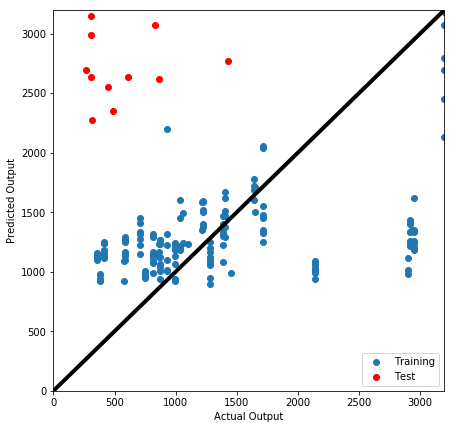

In [382]:
numdescriptors = 8
# train linear model of descriptors
# yrange =  np.arange(1,numdescriptors,1)
# for Y in yrange:
MLR=linear_model.LinearRegression()
MLR.fit(X_train,y_train)
# WE are going to train using the first 8 values

# make predictions on test and train set 
trainpred=MLR.predict(X_train)
# predict the outputs using the training dataset
testpred=MLR.predict(X_test)
# predict using test dataset
#make parity plot 
maxlimit  = y_train.max()

plt.figure(figsize=(7,7))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(y_train,trainpred, label='Training')
plt.scatter(y_test,testpred,color='r', label='Test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')

#calculate the test and train error

print("Train error",mean_squared_error(y_train,trainpred)) # MSE of training dataset
print("Test error",mean_squared_error(y_test,testpred))

# MLR=linear_model.LinearRegression()
# MLR.fit(train[train.columns.values[0:Y]],train[train.columns.values[Y]])
# # WE are going to train using the first 8 values

# # make predictions on test and train set 
# trainpred=MLR.predict(train[train.columns.values[0:Y]])
# # predict the outputs using the training dataset
# testpred=MLR.predict(test[train.columns.values[0:Y]])
# # predict using test dataset
# #make parity plot 
# maxlimit  = train[train.columns.values[Y]].max()

# plt.figure(figsize=(7,7))
# plt.xlim([0,maxlimit]);
# plt.ylim([0,maxlimit]);
# print('This is for Y ='+str(Y))
# plt.scatter(train[train.columns.values[Y]],trainpred, label='Training')
# plt.scatter(test[train.columns.values[Y]],testpred,color='r', label='Test')
# plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
# plt.legend()
# plt.xlabel('Actual Output')
# plt.ylabel('Predicted Output')

# #calculate the test and train error

# print("Train error",mean_squared_error(train[train.columns.values[Y]],trainpred)) # MSE of training dataset
# print("Test error",mean_squared_error(test[train.columns.values[Y]],testpred))
# usually the training error is less than the test error

In [383]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','labelencoded']
X_train=cal[inputs]
y_train = cal['center']
X_test=dat[inputs]
y_test= dat['center']

In [384]:
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#normalized data for Ridge / LASSO 
# train_normalized=train/train.std()
# test_normalized=test/test.std()
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
# y_train_normalized = pd.DataFrame(data=scaler.transform(y_train), columns=y_train.columns)
# y_test_normalized = pd.DataFrame(data=scaler.transform(y_test), columns=y_test.columns)
# Columns cannot have strings because could not convert string to float: "['H2O']"

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by StandardScaler.
  del sys.path[0]


In [385]:
test_normalized.head() 

,fraction,sigma,amplitude,fwhm,height,auc,labelencoded
0,-1.500066,-0.325257,8.967480,-0.325257,44.598024,11.232188,-0.839639
1,-0.112083,-0.560718,38.502913,-0.560718,370.626357,47.747687,0.902770
2,0.243858,-0.567840,275.350293,-0.567840,2601.986857,341.181912,0.902770
3,-1.500004,-0.617302,6.772828,-0.617302,122.550495,8.500264,-0.839639
4,-0.983381,-0.552199,40.635032,-0.552199,418.330462,50.610646,0.321967


Train error 516172.91646769544
Test error 21845281749.81518


Text(0, 0.5, 'Predicted Output')

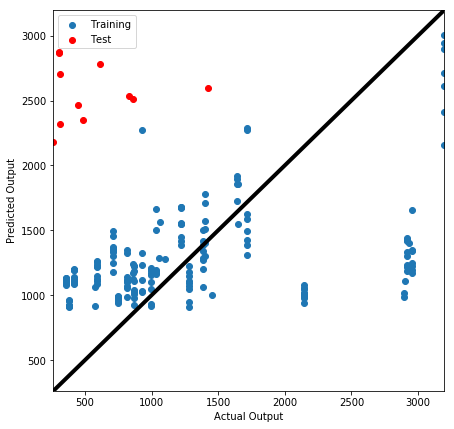

In [386]:
raman_ridge=Ridge()
# numdescriptors = 7 # Y=6 for AUC to be last
# yrange =  np.arange(1,numdescriptors,1)
# for Y in yrange:
a=1e1
raman_ridge.set_params(alpha=a)
raman_ridge.fit(X_train_normalized,y_train)
trainpred = raman_ridge.predict(X_train_normalized)
testpred = raman_ridge.predict(X_test_normalized)
#     print('This is for Y ='+str(Y))
print("Train error",mean_squared_error(y_train,trainpred)) # MSE of training dataset
print("Test error",mean_squared_error(y_test,testpred))
plt.figure(figsize=(7,7))

plt.scatter(y_train,trainpred, label='Training')
plt.scatter(y_test,testpred,color='r', label='Test')
maxlimit  = y_train.max()
minlimit  = y_test.min()
plt.plot([minlimit,maxlimit],[minlimit,maxlimit],lw=4,color='black')
plt.xlim([minlimit,maxlimit]);
plt.ylim([minlimit,maxlimit]);
plt.legend()
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')

In [387]:
inputs=['fraction','sigma','amplitude','fwhm','height','auc','center']
X_train=cal[inputs]
y_train = cal['labelencoded']
X_test=dat[inputs]
y_test= dat['labelencoded']

In [388]:
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#normalized data for Ridge / LASSO 
# train_normalized=train/train.std()
# test_normalized=test/test.std()
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
# y_train_normalized = pd.DataFrame(data=scaler.transform(y_train), columns=y_train.columns)
# y_test_normalized = pd.DataFrame(data=scaler.transform(y_test), columns=y_test.columns)
# Columns cannot have strings because could not convert string to float: "['H2O']"

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  del sys.path[0]


Train error 10.374624939063512
Test error 363112.4871359012


Text(0, 0.5, 'Predicted Output')

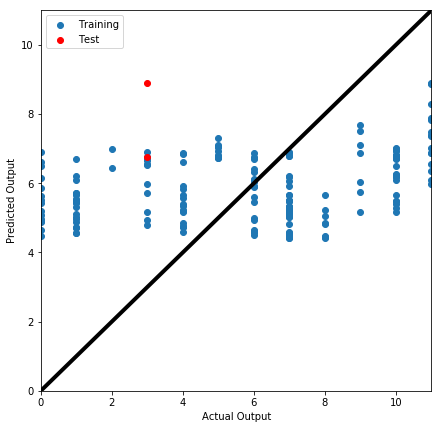

In [389]:
raman_ridge=Ridge()
# numdescriptors = 7 # Y=6 for AUC to be last
# yrange =  np.arange(1,numdescriptors,1)
# for Y in yrange:
a=1e1
raman_ridge.set_params(alpha=a)
raman_ridge.fit(X_train_normalized,y_train)
trainpred = raman_ridge.predict(X_train_normalized)
testpred = raman_ridge.predict(X_test_normalized)
#     print('This is for Y ='+str(Y))
print("Train error",mean_squared_error(y_train,trainpred)) # MSE of training dataset
print("Test error",mean_squared_error(y_test,testpred))
plt.figure(figsize=(7,7))

plt.scatter(y_train,trainpred, label='Training')
plt.scatter(y_test,testpred,color='r', label='Test')
maxlimit  = y_train.max()
minlimit  = y_test.min()
plt.plot([minlimit,maxlimit],[minlimit,maxlimit],lw=4,color='black')
plt.xlim([minlimit,maxlimit]);
plt.ylim([minlimit,maxlimit]);
plt.legend()
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')

## 2-2 Example of searching the $\alpha$ space in RR RIDGE

In [390]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X_train = cal[inputs]
y_train = cal['labelencoded']
X_test = dat[inputs]
y_test = dat['labelencoded']

In [391]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,200) # SEACH THE RANGE OF THE LAMBDA SPACE
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    raman_ridge.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))

Text(0, 0.5, 'Predicted Output')

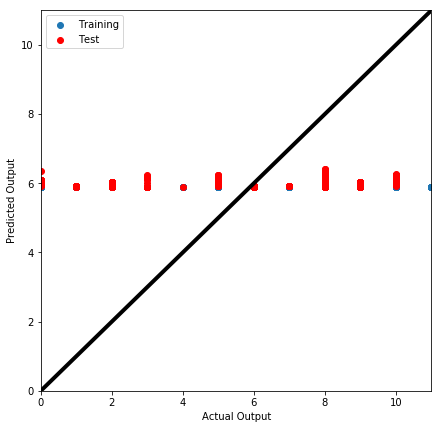

In [392]:
plt.figure(figsize=(7,7))

plt.scatter(y_train,trainpred, label='Training')
plt.scatter(y_test,testpred,color='r', label='Test')
maxlimit  = y_train.max()
minlimit  = y_test.min()
plt.plot([minlimit,maxlimit],[minlimit,maxlimit],lw=4,color='black')
plt.xlim([minlimit,maxlimit]);
plt.ylim([minlimit,maxlimit]);
plt.legend()
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')

Text(0.5, 1.0, 'error vs $\\lambda$')

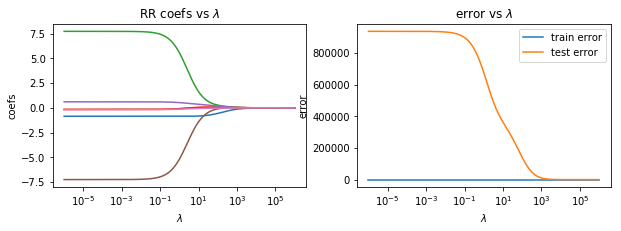

In [393]:
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc=1)
plt.title('error vs $\lambda$')


# LASSO 

In [394]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X_train = cal[inputs]
y_train = cal['labelencoded']
X_test = dat[inputs]
y_test = dat['labelencoded']

In [395]:
from sklearn import linear_model
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#normalized data for Ridge / LASSO 
# train_normalized=train/train.std()
# test_normalized=test/test.std()
scaler = StandardScaler().fit(X_train)
X_train_normalized = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
X_test_normalized = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)
# y_train_normalized = pd.DataFrame(data=scaler.transform(y_train), columns=y_train.columns)
# y_test_normalized = pd.DataFrame(data=scaler.transform(y_test), columns=y_test.columns)
# Columns cannot have strings because could not convert string to float: "['H2O']"

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\Users\user1\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  del sys.path[0]


Train error 11.857750472589794
Test error 9.777352560391812


Text(0, 0.5, 'Predicted Output')

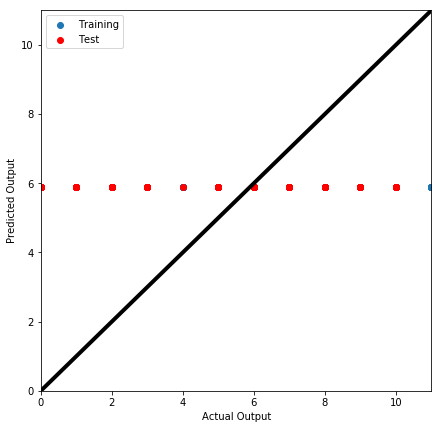

In [396]:
model=linear_model.Lasso()
# numdescriptors = 7 # Y=6 for AUC to be last
# yrange =  np.arange(1,numdescriptors,1)
# for Y in yrange:
a=1e1
model.set_params(alpha=a)
model.fit(X_train_normalized,y_train)
trainpred = model.predict(X_train_normalized)
testpred = model.predict(X_test_normalized)
#     print('This is for Y ='+str(Y))
print("Train error",mean_squared_error(y_train,trainpred)) # MSE of training dataset
print("Test error",mean_squared_error(y_test,testpred))
plt.figure(figsize=(7,7))

plt.scatter(y_train,trainpred, label='Training')
plt.scatter(y_test,testpred,color='r', label='Test')
maxlimit  = y_train.max()
minlimit  = y_test.min()
plt.plot([minlimit,maxlimit],[minlimit,maxlimit],lw=4,color='black')
plt.xlim([minlimit,maxlimit]);
plt.ylim([minlimit,maxlimit]);
plt.legend()
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')

In [397]:
model=linear_model.Lasso()
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

Y = 8
X = 0
# do you know what is happening here? 
lambdas = np.logspace(-6,6,20) # SEACH THE RANGE OF THE LAMBDA SPACE

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(X_train_normalized,y_train)
    raman_ridge.fit(X_train_normalized,y_train)
    trainpred = model.predict(X_train_normalized)
    testpred = model.predict(X_test_normalized)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(y_train,trainpred))
    testerror.append(mean_squared_error(y_test,testpred))

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Text(0, 0.5, 'Predicted Output')

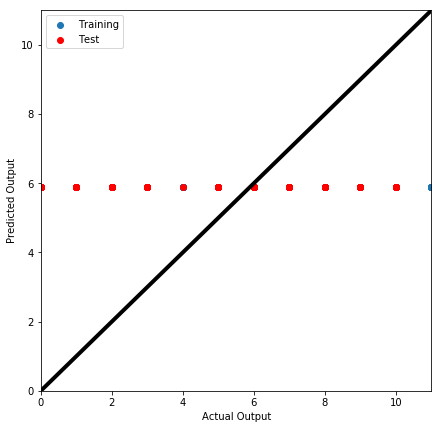

In [398]:
plt.figure(figsize=(7,7))

plt.scatter(y_train,trainpred, label='Training')
plt.scatter(y_test,testpred,color='r', label='Test')
maxlimit  = y_train.max()
minlimit  = y_test.min()
plt.plot([minlimit,maxlimit],[minlimit,maxlimit],lw=4,color='black')
plt.xlim([minlimit,maxlimit]);
plt.ylim([minlimit,maxlimit]);
plt.legend()
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')

Text(0.5, 1.0, 'error vs $\\lambda$')

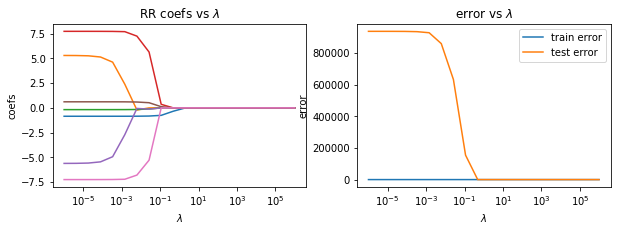

In [399]:
plt.figure(figsize=(10,3))
plt.locator_params(nbins=5)
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
#plt.xlim(1e-4,1e0)

plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
#plt.xlim(1e-4,1e0)
#plt.ylim(0,0.5)
plt.legend(loc=1)
plt.title('error vs $\lambda$')

# Support Vector Machines

In [400]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

In [401]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X_train = cal[inputs]
y_train = cal['labelencoded']
X_test = dat[inputs]
y_test = dat['labelencoded']

In [402]:
#Import svm model
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


[[  0   0   0   0   0   0   0   0   0   0   0  42]
 [  0   0   0   0   0   0   0   0   2   0   0  20]
 [  0  41   0   0   0   0   0   0   0   0   0  31]
 [  4  11   1   0   0  32   0   2   0   0  49  14]
 [  0   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  85]
 [ 25   0   0   0   0   0   0   0   0   0   0  25]
 [  0  11   0   0   0   0   0   0   0   0   0   0]
 [  0 122   7   0   0   0   0   0   0   0   0  26]
 [  0 148   0   0   0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        85
        

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user1\Anaconda3\lib\sit

In [403]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree=8)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[  0   0   0   0   0   0   0   0   0   0   0  42]
 [  0   0   0   0   0   0   0   0   0   0   0  22]
 [  0   0   0   0   0   0   0   0   0   0   0  72]
 [  0   0   0   0   0   0   0   0   0   0   0 113]
 [  0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0  85]
 [  0   0   0   0   0   0   0   0   0   0   0  50]
 [  0   0   0   0   0   0   0   0   0   0   0  11]
 [  0   0   0   0   0   0   0   0   0   0   0 155]
 [  0   0   0   0   0   0   0   0   0   0   0 150]
 [  0   0   0   0   0   0   0   0   0   0   0  86]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        85
        

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'pre

In [404]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[ 42   0   0   0   0   0   0   0   0   0   0]
 [ 22   0   0   0   0   0   0   0   0   0   0]
 [ 72   0   0   0   0   0   0   0   0   0   0]
 [113   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0]
 [ 85   0   0   0   0   0   0   0   0   0   0]
 [ 50   0   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   0   0   0   0   0   0]
 [155   0   0   0   0   0   0   0   0   0   0]
 [150   0   0   0   0   0   0   0   0   0   0]
 [ 86   0   0   0   0   0   0   0   0   0   0]]


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.05      1.00      0.10        42
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        85
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00       155
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        86

   micro avg       0.05      0.05      0.05       787
   macro avg       0.00      0.09      0.01       787
weighted avg       0.00      0.05      0.01       787

Accuracy: 0.053367217280813214


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [405]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[  0   0   0   0   0   0   0  42   0   0   0]
 [  0   0   0   0   0   0   0  22   0   0   0]
 [  0   0   0   0   0   0   0  72   0   0   0]
 [  0   0   0   0   0   0   0 113   0   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0  85   0   0   0]
 [  0   0   0   0   0   0   0  50   0   0   0]
 [  0   0   0   0   0   0   0  11   0   0   0]
 [  0   0   0   0   0   0   0 155   0   0   0]
 [  0   0   0   0   0   0   0 150   0   0   0]
 [  0   0   0   0   0   0   0  86   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00       113
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        85
           6       0.00      0.00      0.00        50
           7       0.01      1.00      0.03      

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

# Decision Trees # specifically to see if below descriptors can find and predict Area under curve # Strings needed to be converted to floats anyways so the labelling relationship was not possible

In [406]:
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import tree

In [407]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X_train = cal[inputs]
y_train = cal['labelencoded']
X_test = dat[inputs]
y_test = dat['labelencoded']

In [408]:
DT=tree.DecisionTreeRegressor(max_depth=3)
DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [409]:
import os
#conda install -c conda-forge pydotplus=2.0.2
# http://www.webgraphviz.com
import pydotplus 

In [410]:
with open("basic_tree.dot", 'w') as f:
    f = tree.export_graphviz(DT, out_file=f)

In [411]:
#http://www.webgraphviz.com
# os.unlink('basic_tree.dot')

dot_data = tree.export_graphviz(DT, out_file=None,feature_names=inputs)
graph = pydotplus.graph_from_dot_data(dot_data) 
#graph.write_pdf("basic_tree.pdf") 

In [412]:
os.environ["PATH"] += os.pathsep + 'C:/Users/user1/Anaconda3/Library/bin/graphviz/'

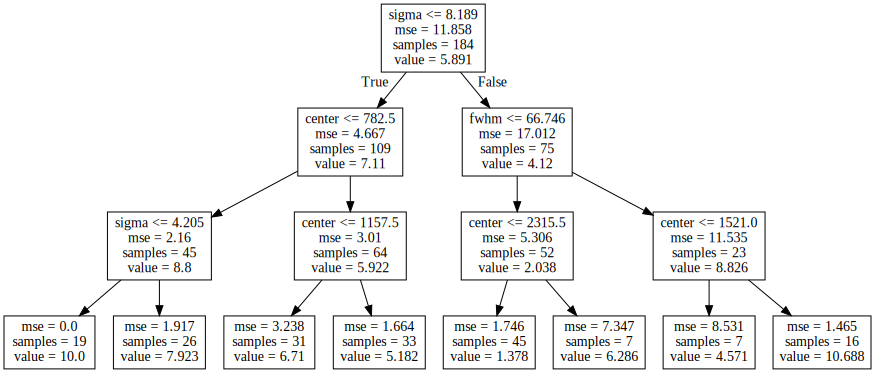

In [413]:
from IPython.display import SVG, display
display(SVG(graph.create_svg()))

10.6875
Train error 2.2733721546199632
Test error 7.904906298781202


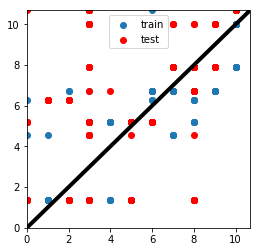

In [414]:
# make predictions on test and train set 
trainpred=DT.predict(X_train)
testpred=DT.predict(X_test)

maxlimit =testpred.max()
print(maxlimit)
#parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,maxlimit]);
plt.ylim([0,maxlimit]);
plt.scatter(y_train,trainpred, label ='train')
plt.scatter(y_test,testpred,color='r', label = 'test')
plt.plot([0,maxlimit],[0,maxlimit],lw=4,color='black')
plt.legend()
#calculate the test and train error
print("Train error",mean_squared_error(y_train,trainpred))
print("Test error",mean_squared_error(y_test,testpred))

Text(0, 0.5, 'MSE for $auc$')

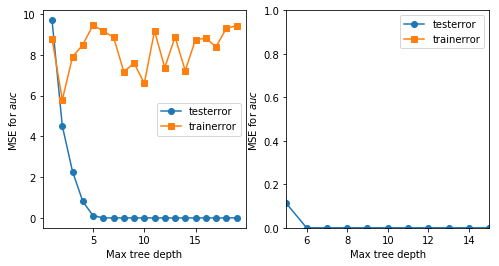

In [415]:
trainerror = []
testerror = []

trees = np.arange(1,20,1)
#model=tree.DecisionTreeRegressor()

# loop over lambda values (strength of regularization)
for t in trees:
    model=tree.DecisionTreeRegressor(max_depth=t)
    model.fit(X_train,y_train)
    trainerror.append(mean_squared_error(y_train,model.predict(X_train)))
    testerror.append(mean_squared_error(y_test,model.predict(X_test)))
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $auc$')
plt.subplot(122)
plt.plot(trees,trainerror,marker='o',label='testerror')
plt.plot(trees,testerror,marker="s",label='trainerror')
plt.ylim((0,1))
plt.xlim((5,15))
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $auc$')


# KNN

In [416]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X_train = cal[inputs]
y_train = cal['labels']
X_test = dat[inputs]
y_test = dat['labels']

In [417]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline
# this is a new library you haven't seen before, what do you think it does? 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [418]:
KNNmodel = KNeighborsClassifier(n_neighbors=3) # initialize the model by choosing the number of neighbors (flexibility of model in this case)
# KNNmodel = KNeighborsClassifier(n_neighbors=1) minimum neighbord minimum predicted error
# remember the parabolic function of training vs. test set there is limit to the flexilibility vs. errors of the model
# Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 20
# thus KNNmodel = KNeighborsClassifier(n_neighbors=15) is max

In [419]:
KNNmodel.fit(X_train, y_train) # feed the model some training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [420]:
rate = KNNmodel.predict(X_train) == y_train # USE TO PREDICT NEW X DATA PUT INTO THE TRAINING MODEL
print('Training Error Rate:', np.mean(rate)) # COMPARING THE PREDICTED VALUES WITH ACTUAL RATE VALUES

rate = KNNmodel.predict(X_test) == y_test
print('Testing Error Rate:', np.mean(rate))

Training Error Rate: 0.967391304347826
Testing Error Rate: 0.2121982210927573


Text(0.5, 1.0, 'Training and Test data plotted')

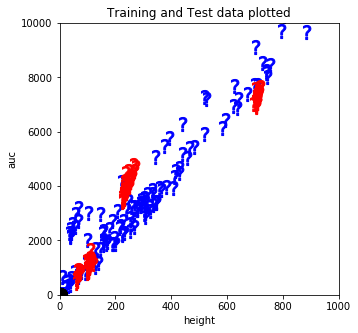

In [421]:
fig, ax = plt.subplots(figsize=(5, 5))
colors = ['b', 'r', 'k']
shapes = ['s', '^', 'o']
#zip function is very useful to 
for typ, color, shape in zip(cal.labels.unique(), colors, shapes): #iterating to scatter plot black blue and red dots through types colors and shapes 
    ax.scatter(cal[cal.labels==typ].height, cal[cal.labels==typ].auc, s=200, marker=shape, color=color)
    ax.scatter(dat[dat.labels==typ].height, dat[dat.labels==typ].auc, s=200, marker=r'$?$', color=color )
    
ax.set_xlim([0, 1000])
ax.set_ylim([0, 10000])
ax.set_xlabel('height')
ax.set_ylabel('auc')
ax.set_title('Training and Test data plotted')

In [422]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import svm

In [423]:
inputs=['fraction','sigma','center','amplitude','fwhm','height','auc']
X_train = cal[inputs]
y_train = cal['labelencoded']
X_test = dat[inputs]
y_test = dat['labelencoded']

# KNN CROSS VALIDATION FROM https://www.ritchieng.com/machine-learning-cross-validation/ and lectures 

In [424]:
X = pd.concat([cal[inputs],dat[inputs]])
y = pd.concat([cal['labels'],dat['labels']])
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.6952381  0.78431373 0.75757576 0.74226804 0.79381443 0.69072165
 0.67010309 0.61702128 0.74193548 0.73333333]


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [425]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.7226324888598941


In [426]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The

[0.8022948620910657, 0.7535500732620262, 0.7658396265926131, 0.7288019574202835, 0.7226324888598941, 0.68954528238598, 0.6840603498667432, 0.6807421618764781, 0.6585755952397243, 0.6524453052676435, 0.6417877166752695, 0.6256099116791836, 0.6242002671441533, 0.6162090591794833, 0.6142476387684961, 0.60145996655517, 0.5984766918392713, 0.5854956898662762, 0.5834064905905122, 0.5813188167709971, 0.5752502465816831, 0.578247831341822, 0.5770118923202905, 0.5718753926377316, 0.5725901825361244, 0.5695611517003447, 0.5586026663523935, 0.5513724599864117, 0.5529435646671568, 0.555008613436204]


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [427]:
# in essence, this is basically running the k-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.8022948620910657


Text(0, 0.5, 'Cross-validated accuracy')

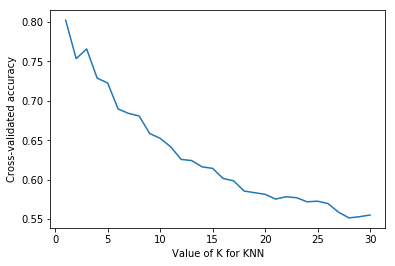

In [428]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [429]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.5813188167709971


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


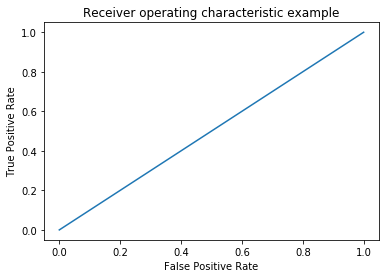

In [430]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

In [431]:
# additional library we will use 
from matplotlib.colors import ListedColormap

# just for convenience and similarity with sklearn tutorial
# I am going to assign our X and Y data to specific vectors
# this is not strictly needed and you could use elements df for the whole thing!
elements = pd.concat([cal[inputs],dat[inputs]])
X=elements[['height','auc']]
print(X)
#this is a trick to turn our strings (type of element / class) into unique 
#numbers.  Play with this in a separate cell and make sure you know wth is 
#going on!
levels,labels=pd.factorize(elements.label)
levels =elements.labelencoded
labels = elements.labels
y = elements.center
print(levels)
print(labels)
#This determines levelspacing for our color map and the colors themselves
h=0.02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# in the sklearn tutorial two different weights are compared
# the decision between "uniform" and "distance" determines the probability
# weight.  "uniform" is the version presented in class, you can change to 
# distance
weights='uniform'
# weights='distance'

# I am actually refitting the KNN here. If you had a big data set you would
# not do this, but I want you to have the convenience of changing K or 
# weights here in this cell. Large training sets with many features can take 
# awhile for KNN training! 

K=5
clf = KNeighborsClassifier(n_neighbors=K, weights=weights)
clf.fit(X,y)

# Straight from the tutorial - quickly read and see if you know what these 
# things are going - if you are < 5 min until end then you should skip this part 

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = elements.height.min() - 0.1  , elements.height.max() + 0.1
y_min, y_max = elements.auc.min() - 0.1  , elements.auc.max() + 0.1  
print(y_min, y_max, h)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(4,4));
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light,vmin=0,vmax=np.max(y))
# Plot also the training points
# This may be the 1st time you have seen how to color points by a 3rd vector
# In this case y ( see c=y in below statement ). This is very useful! 
plt.scatter(X.height, X.auc, c=y, cmap=cmap_bold)

# Set limits and lebels 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('height')
plt.ylabel('auc')

                 height       auc
0              0.330487   3.94401
0             0.0413051  0.386659
0              0.312569   3.15038
0              0.880254   10.8495
0             0.0964968   1.41272
0              0.161312   1.79549
0              0.867108    6.2595
0              0.880978   8.89028
0              0.125002    1.6246
0              0.596285   6.47718
0               1.02091   10.4929
0              0.809799   71.9537
0               0.33513   3.18133
0              0.182368   2.59502
0              0.199396   3.00774
0              0.221675   3.76715
0              0.644542   116.333
0              0.332534   3.98599
0             0.0499614  0.455327
0              0.376098   3.80399
0              0.886754   11.0587
0              0.121395   6.60706
0              0.115966   1.68536
0              0.161885   1.76703
0              0.880657   5.97707
0              0.688681   6.88339
0              0.127001    2.3027
0              0.149483   11.6062
0             

AttributeError: 'DataFrame' object has no attribute 'label'